In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn
from pprint import pprint
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn. model_selection import train_test_split
%matplotlib inline

In [2]:
train = pd.read_csv('Train.zip')
test = pd.read_csv('Test.zip')


In [3]:
print('train shape:', train.shape)
print('test shape:', test.shape)


train shape: (42000, 785)
test shape: (28000, 784)


In [4]:
train.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [5]:
test.head()


pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

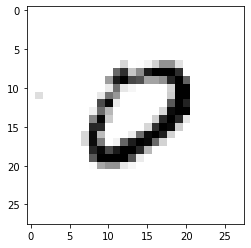

In [6]:
###visualising data
image0 = test.iloc[3,:]     
                                        
img = np.array(image0).reshape(28,28)
plt.imshow(img,cmap='binary')


In [7]:
###spliting train data set
X = train.drop('label',axis=1)
Y = train['label']


In [8]:
###normalizing x and extracting y values
X = np.array(X, dtype="float") / 255.0
Y = Y.values


In [9]:
###Random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
# Creating the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]}


In [10]:
params = {'bootstrap': False,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 140}


In [26]:
###fitting the model
rforest = RandomForestClassifier(**params)
rforest.fit(X,Y)


RandomForestClassifier(bootstrap=False, max_depth=40, n_estimators=140)

In [12]:
###Measuring performance on training set
Y_train_predicted = rforest.predict(X)


In [28]:
Y_train

array([5, 0, 3, ..., 2, 9, 2], dtype=int64)

1.0

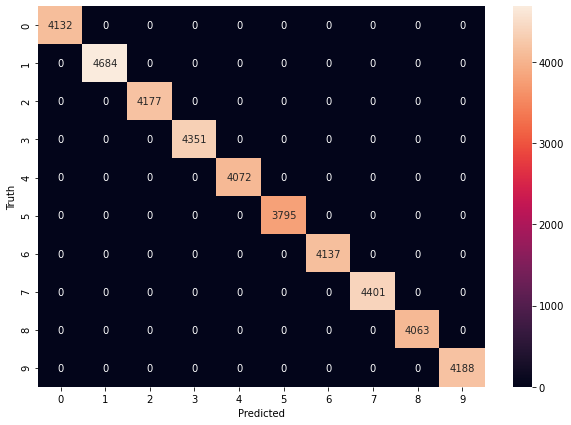

In [13]:
###confusion matrix for model evaluation
cmrforest = confusion_matrix(Y, Y_train_predicted)

plt.figure(figsize=(10,7))
sn.heatmap(cmrforest ,annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
rforest.score(X,Y)

In [14]:
###preparing test data set
X_test = np.array(test, dtype="float") / 255.0

In [29]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
###Making predictions on test data
Y_predicted = rforest.predict(X_test)

Y_predicted.shape

(28000,)

In [30]:
Y_predicted

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [16]:
###making prediction table
index = np.arange(1, Y_predicted.shape[0]+1)
data = {'ImageId' : index, "Label" : Y_predicted}
df = pd.DataFrame(data=data)
df.head()


ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))